<a href="https://colab.research.google.com/github/mylukhanush/types_of_graphs-/blob/main/Types_of_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** TYPES OF GRAPH:-**

In [14]:
# Install necessary libraries if not present
!pip install pyspark plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, to_date, month, year, sum as _sum

# Initialize Spark
spark = SparkSession.builder.appName("/Chocolate Sales (2).csv").getOrCreate()

# Load CSV
# Replace 'Chocolate Sales (2).csv' with your actual file path in Colab
df_spark = spark.read.csv('/Chocolate Sales (2).csv', header=True, inferSchema=True)

# Data Cleaning: Convert Amount to Float and Date to DateType
df_spark = df_spark.withColumn("Amount", regexp_replace(col("Amount"), "[$,]", "").cast("float"))
df_spark = df_spark.withColumn("Date", to_date(col("Date"), "dd/MM/yyyy"))

# Feature Engineering
df_spark = df_spark.withColumn("Month", month(col("Date")))
df_spark = df_spark.withColumn("Year", year(col("Date")))

# Convert to Pandas for Visualization
df = df_spark.toPandas()
df = df.dropna()
sns.set(style="whitegrid")

Bar Chart – Top 10 Sales Persons

/tmp/ipython-input-4058471239.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




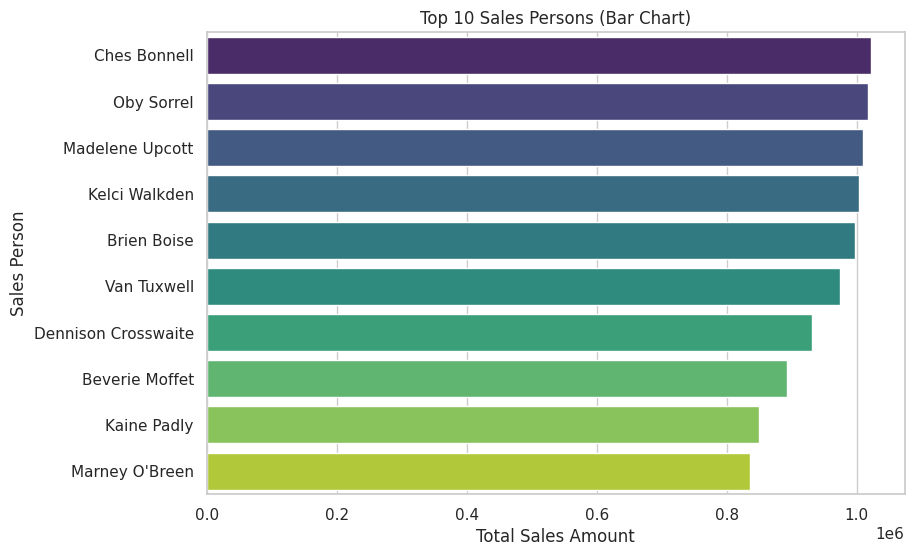

In [39]:
plt.figure(figsize=(9, 6))

sales_person = (
    df.groupby('Sales Person')['Amount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(
    x=sales_person.values,
    y=sales_person.index,
    palette="viridis"
)

plt.title("Top 10 Sales Persons (Bar Chart)")
plt.xlabel("Total Sales Amount")
plt.ylabel("Sales Person")
plt.show()


Column Chart – Revenue by Country

/tmp/ipython-input-1157243524.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




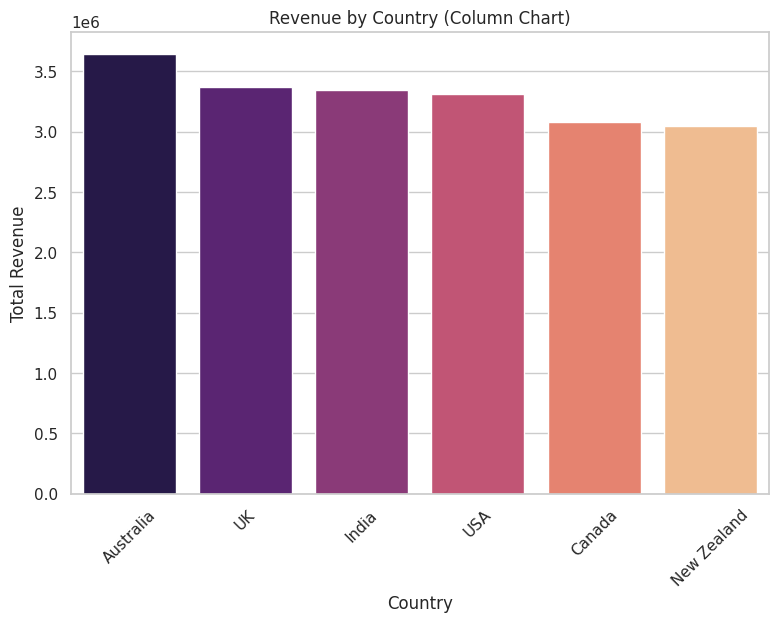

In [41]:
plt.figure(figsize=(9, 6))

country_sales = (
    df.groupby('Country')['Amount']
      .sum()
      .sort_values(ascending=False)
)

sns.barplot(
    x=country_sales.index,
    y=country_sales.values,
    palette="magma"
)

plt.title("Revenue by Country (Column Chart)")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


Line Chart – Monthly Sales Trend

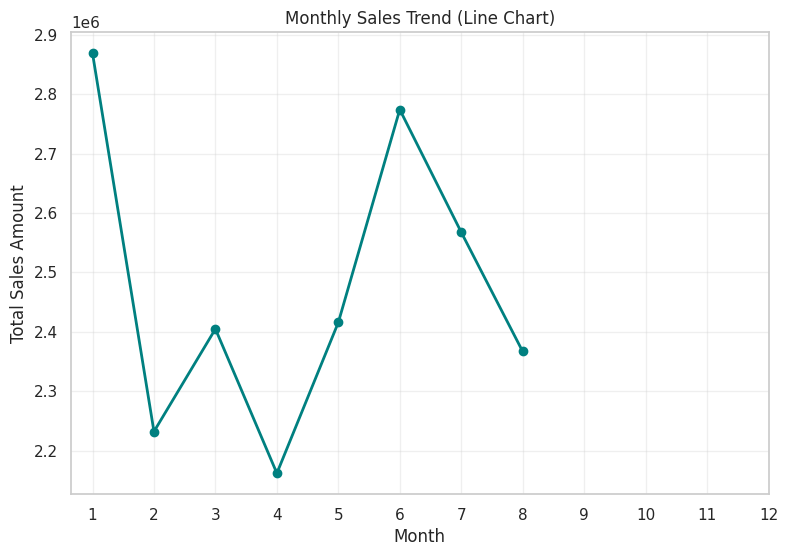

In [25]:
plt.figure(figsize=(9, 6))

monthly_sales = df.groupby('Month')['Amount'].sum()

plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker='o',
    color='teal',
    linewidth=2
)

plt.title("Monthly Sales Trend (Line Chart)")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()


Area Chart – Cumulative Revenue Growth

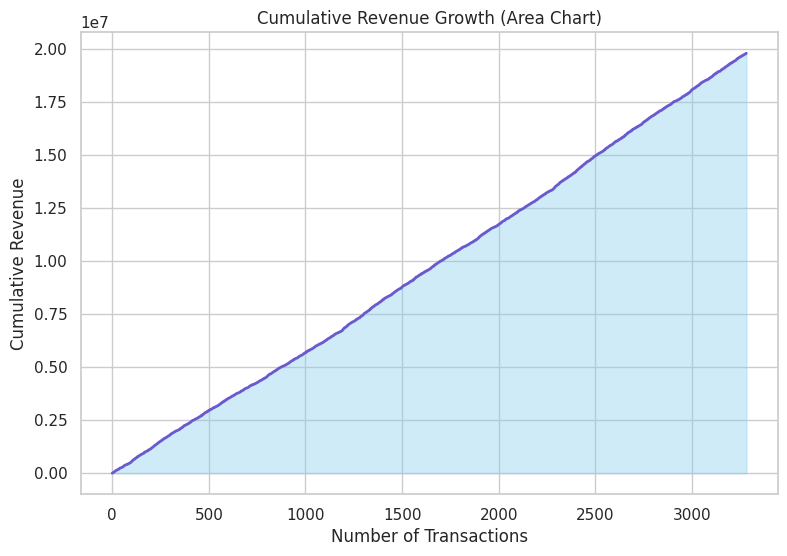

In [26]:
plt.figure(figsize=(9, 6))

df_sorted = df.sort_values('Date')
cumulative_sales = df_sorted['Amount'].cumsum()

plt.fill_between(
    range(len(cumulative_sales)),
    cumulative_sales,
    color="skyblue",
    alpha=0.4
)

plt.plot(
    range(len(cumulative_sales)),
    cumulative_sales,
    color="slateblue",
    linewidth=2
)

plt.title("Cumulative Revenue Growth (Area Chart)")
plt.xlabel("Number of Transactions")
plt.ylabel("Cumulative Revenue")
plt.show()


Pie Chart (Product Volume Share)

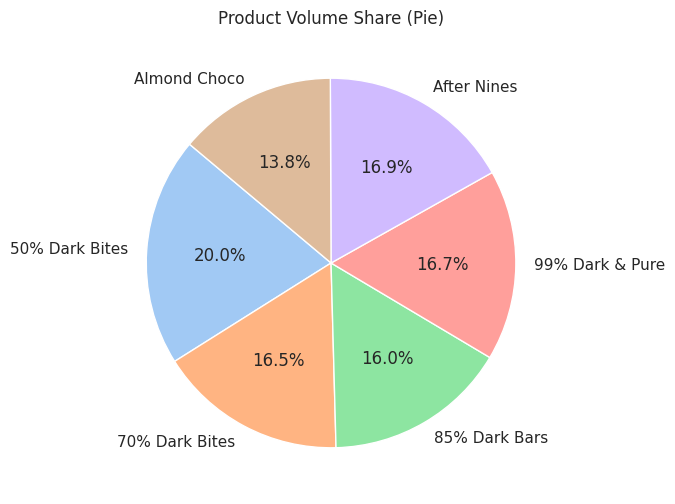

In [27]:


plt.figure(figsize=(8, 6))

prod_boxes = df.groupby('Product')['Boxes Shipped'].sum().head(6)

plt.pie(
    prod_boxes,
    labels=prod_boxes.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Product Volume Share (Pie)")
plt.show()


Doughnut Chart (Top 5 Products Revenue)

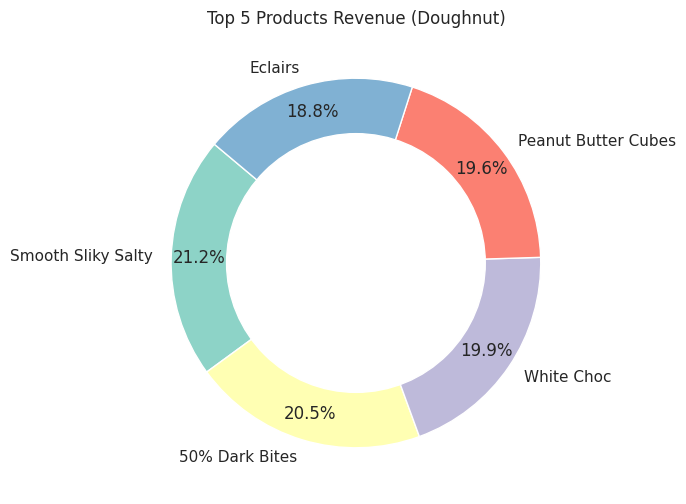

In [28]:


plt.figure(figsize=(8, 6))

prod_rev = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5)

plt.pie(
    prod_rev,
    labels=prod_rev.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=sns.color_palette("Set3")
)

# Doughnut hole
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

plt.title("Top 5 Products Revenue (Doughnut)")
plt.show()


Scatter Chart (Boxes Shipped vs Amount)

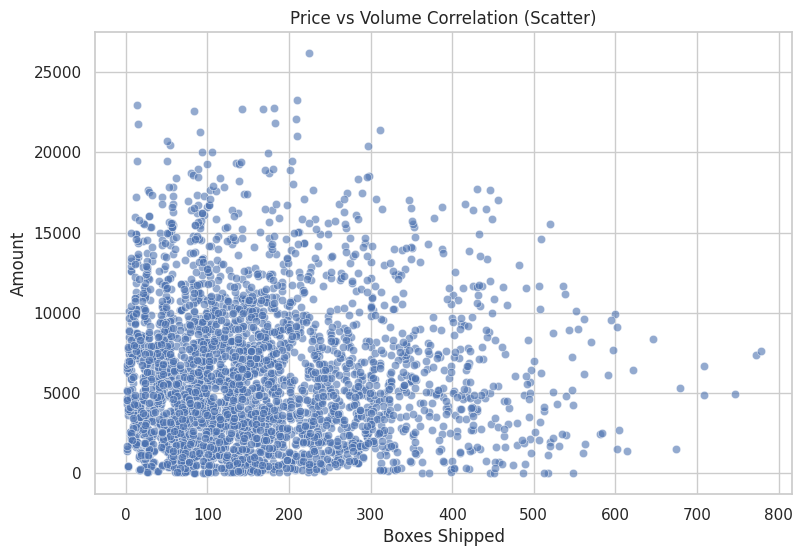

In [29]:
plt.figure(figsize=(9, 6))

sns.scatterplot(data=df, x="Boxes Shipped", y="Amount", alpha=0.6)

plt.title("Price vs Volume Correlation (Scatter)")
plt.show()

Bubble Chart (Size = Amount, Color = Country)

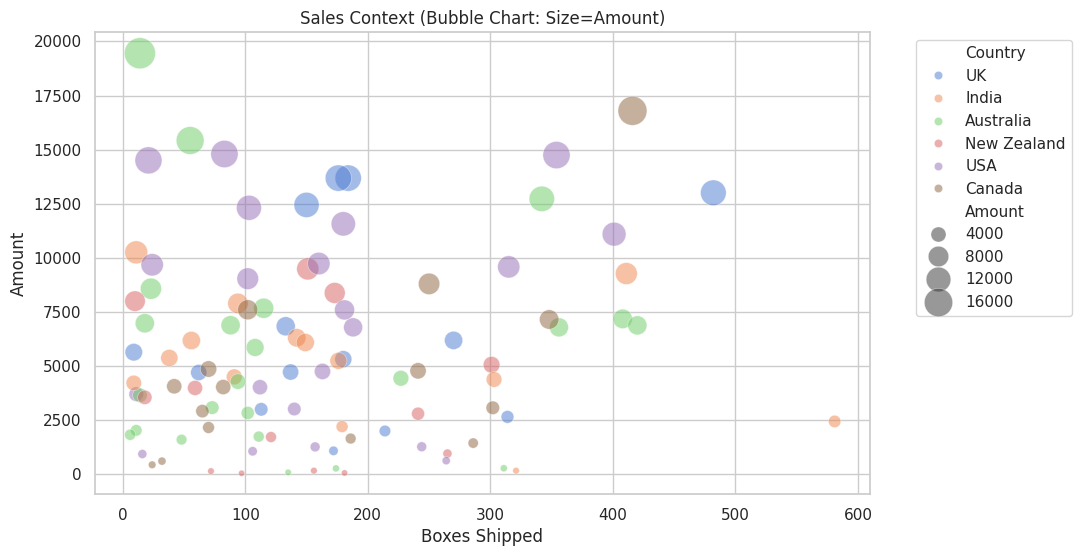

In [30]:


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df.head(100),
    x="Boxes Shipped",
    y="Amount",
    size="Amount",
    hue="Country",
    sizes=(20, 500),
    alpha=0.5,
    palette="muted"
)

plt.title("Sales Context (Bubble Chart: Size=Amount)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


Stacked Bar Chart (Country vs Product Revenue)

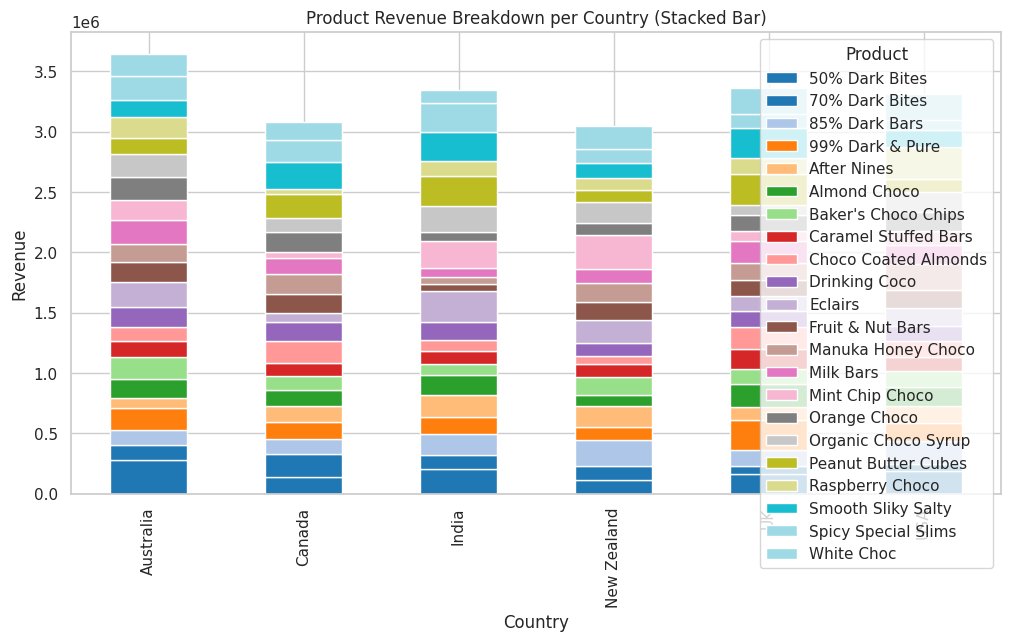

In [31]:


pivot_df = df.groupby(['Country', 'Product'])['Amount'].sum().unstack().fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20")

plt.title("Product Revenue Breakdown per Country (Stacked Bar)")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.show()


Heatmap Comparison Chart (Sales Person vs Product)

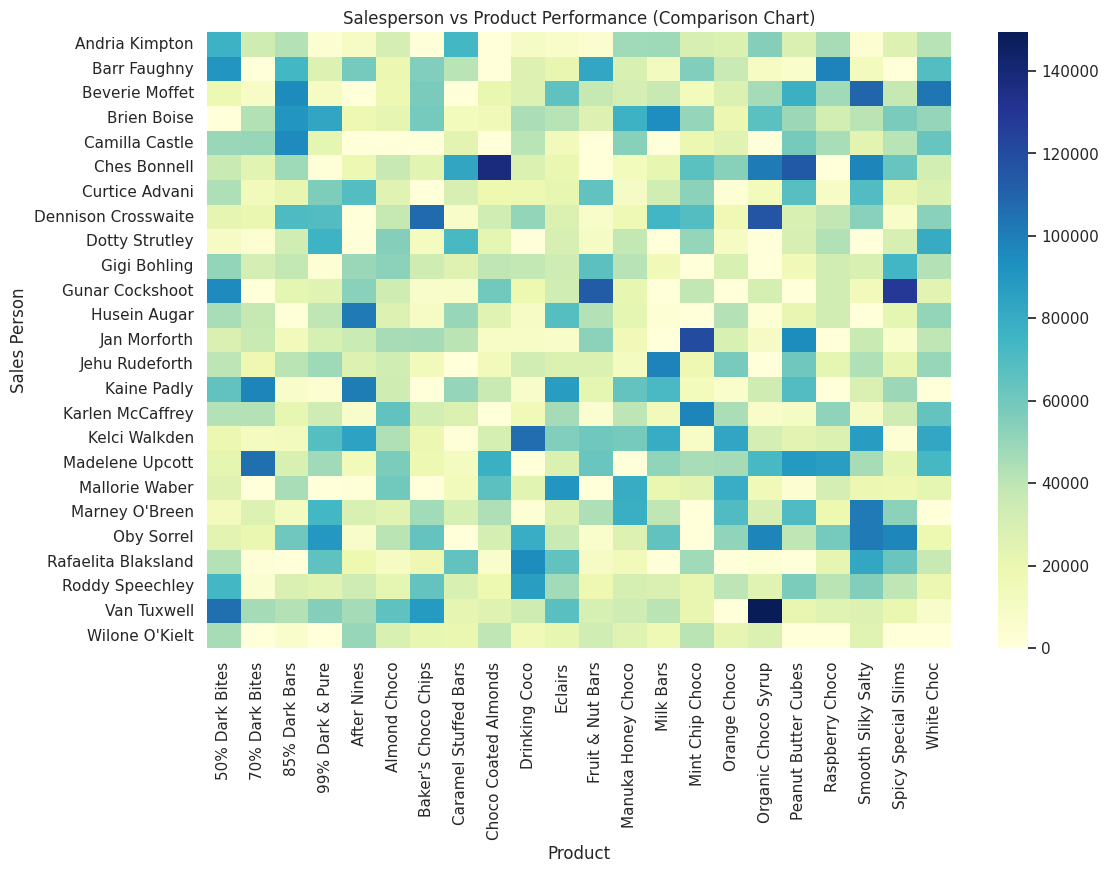

In [32]:


plt.figure(figsize=(12, 8))

comparison = df.pivot_table(
    index='Sales Person',
    columns='Product',
    values='Amount',
    aggfunc='sum'
).fillna(0)

sns.heatmap(comparison, annot=False, cmap="YlGnBu")

plt.title("Salesperson vs Product Performance (Comparison Chart)")
plt.xlabel("Product")
plt.ylabel("Sales Person")
plt.show()


Spider / Radar Chart (Plotly)

In [36]:
import plotly.graph_objects as go

categories = ['Revenue', 'Boxes', 'Avg Sale Price']

# Filter data for one salesperson
person_data = df[df['Sales Person'] == 'Jehu Rudeforth']

# Stats (normalized for comparison)
stats = [
    person_data['Amount'].sum() / 1000,          # Revenue (in 1000s)
    person_data['Boxes Shipped'].sum() / 10,     # Boxes (scaled)
    person_data['Amount'].mean()                 # Avg Sale Price
]

fig_radar = go.Figure()

fig_radar.add_trace(go.Scatterpolar(
    r=stats,
    theta=categories,
    fill='toself',
    name='Jehu Rudeforth'
))

fig_radar.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Sales Performance Radar"
)

fig_radar.show()


Gauge Chart (Annual Sales Target Achievement)

You achieved 19.79M sales while the target was 5M, so you exceeded the target by 14.79M.

In [37]:
import plotly.graph_objects as go

total_sales = df['Amount'].sum()
target = 5000000  # Example Target

fig_gauge = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=total_sales,
    title={'text': "Annual Sales Target Achievement (Gauge)"},
    delta={'reference': target},
    gauge={
        'axis': {'range': [None, target * 1.2]},
        'steps': [
            {'range': [0, target * 0.7], 'color': "lightgray"},
            {'range': [target * 0.7, target], 'color': "gray"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': target
        }
    }
))

fig_gauge.show()
